In [1]:
import pickle as pkl
import tqdm.notebook as tqdm
import cv2
import torch
import time

from numpy import random
import os
import tqdm.notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance 
from IPython import display
from ipywidgets import Output

import custom_utils
torch.backends.cudnn.benchmark = True

aircraft-detection custom utils


In [20]:
%matplotlib inline

In [3]:
#static camera properties
touchdown_target_lat_lon = [1.3541354199301814, 103.97961848373048]

data_indexes = [1,2]
data_sources = []
t = 2
r = 1
w = 1

for data_index in data_indexes:
    data_sources.append([f'dataset\\t{t}\\r{r}\\w{w}\\{data_index}\\data.pkl', f'dataset\\t{t}\\r{r}\\w{w}\\{data_index}\\video.avi'])
    
acd = custom_utils.aircraft_camera_data(data_sources = data_sources, touchdown_target_lat_lon = touchdown_target_lat_lon, model_sources = ["trained_mlp\\wsss_mono_view_1.pt", "trained_mlp\\wsss_mono_view_2.pt", "trained_mlp\\wsss_stereo.pt"])

acd.initiate_yolov7()
acd.initiate_mlp_dual()

Adding autoShape... 


In [56]:
imgs = acd.get_frame_from_video_batch(1,4)

In [57]:
cropped_imgs = []
for i in imgs:
    cropped_imgs.append(np.ascontiguousarray(i[:640,:640]))

In [58]:
pred = acd.yolo_model(cropped_imgs)

In [59]:
pred.print()

image 1/64: 640x640 1 airplane
image 2/64: 640x640 1 airplane
image 3/64: 640x640 1 airplane
image 4/64: 640x640 1 airplane
image 5/64: 640x640 1 airplane
image 6/64: 640x640 1 airplane
image 7/64: 640x640 1 airplane
image 8/64: 640x640 1 airplane
image 9/64: 640x640 1 airplane
image 10/64: 640x640 1 airplane
image 11/64: 640x640 1 airplane
image 12/64: 640x640 1 airplane
image 13/64: 640x640 1 airplane
image 14/64: 640x640 1 airplane
image 15/64: 640x640 1 airplane
image 16/64: 640x640 1 airplane
image 17/64: 640x640
image 18/64: 640x640 1 airplane
image 19/64: 640x640 1 airplane
image 20/64: 640x640 1 airplane
image 21/64: 640x640 1 airplane
image 22/64: 640x640 1 airplane
image 23/64: 640x640 1 airplane
image 24/64: 640x640
image 25/64: 640x640
image 26/64: 640x640 1 airplane
image 27/64: 640x640 1 airplane
image 28/64: 640x640 1 airplane
image 29/64: 640x640 1 airplane
image 30/64: 640x640
image 31/64: 640x640 1 airplane
image 32/64: 640x640 1 airplane
image 33/64: 640x640 1 airpla

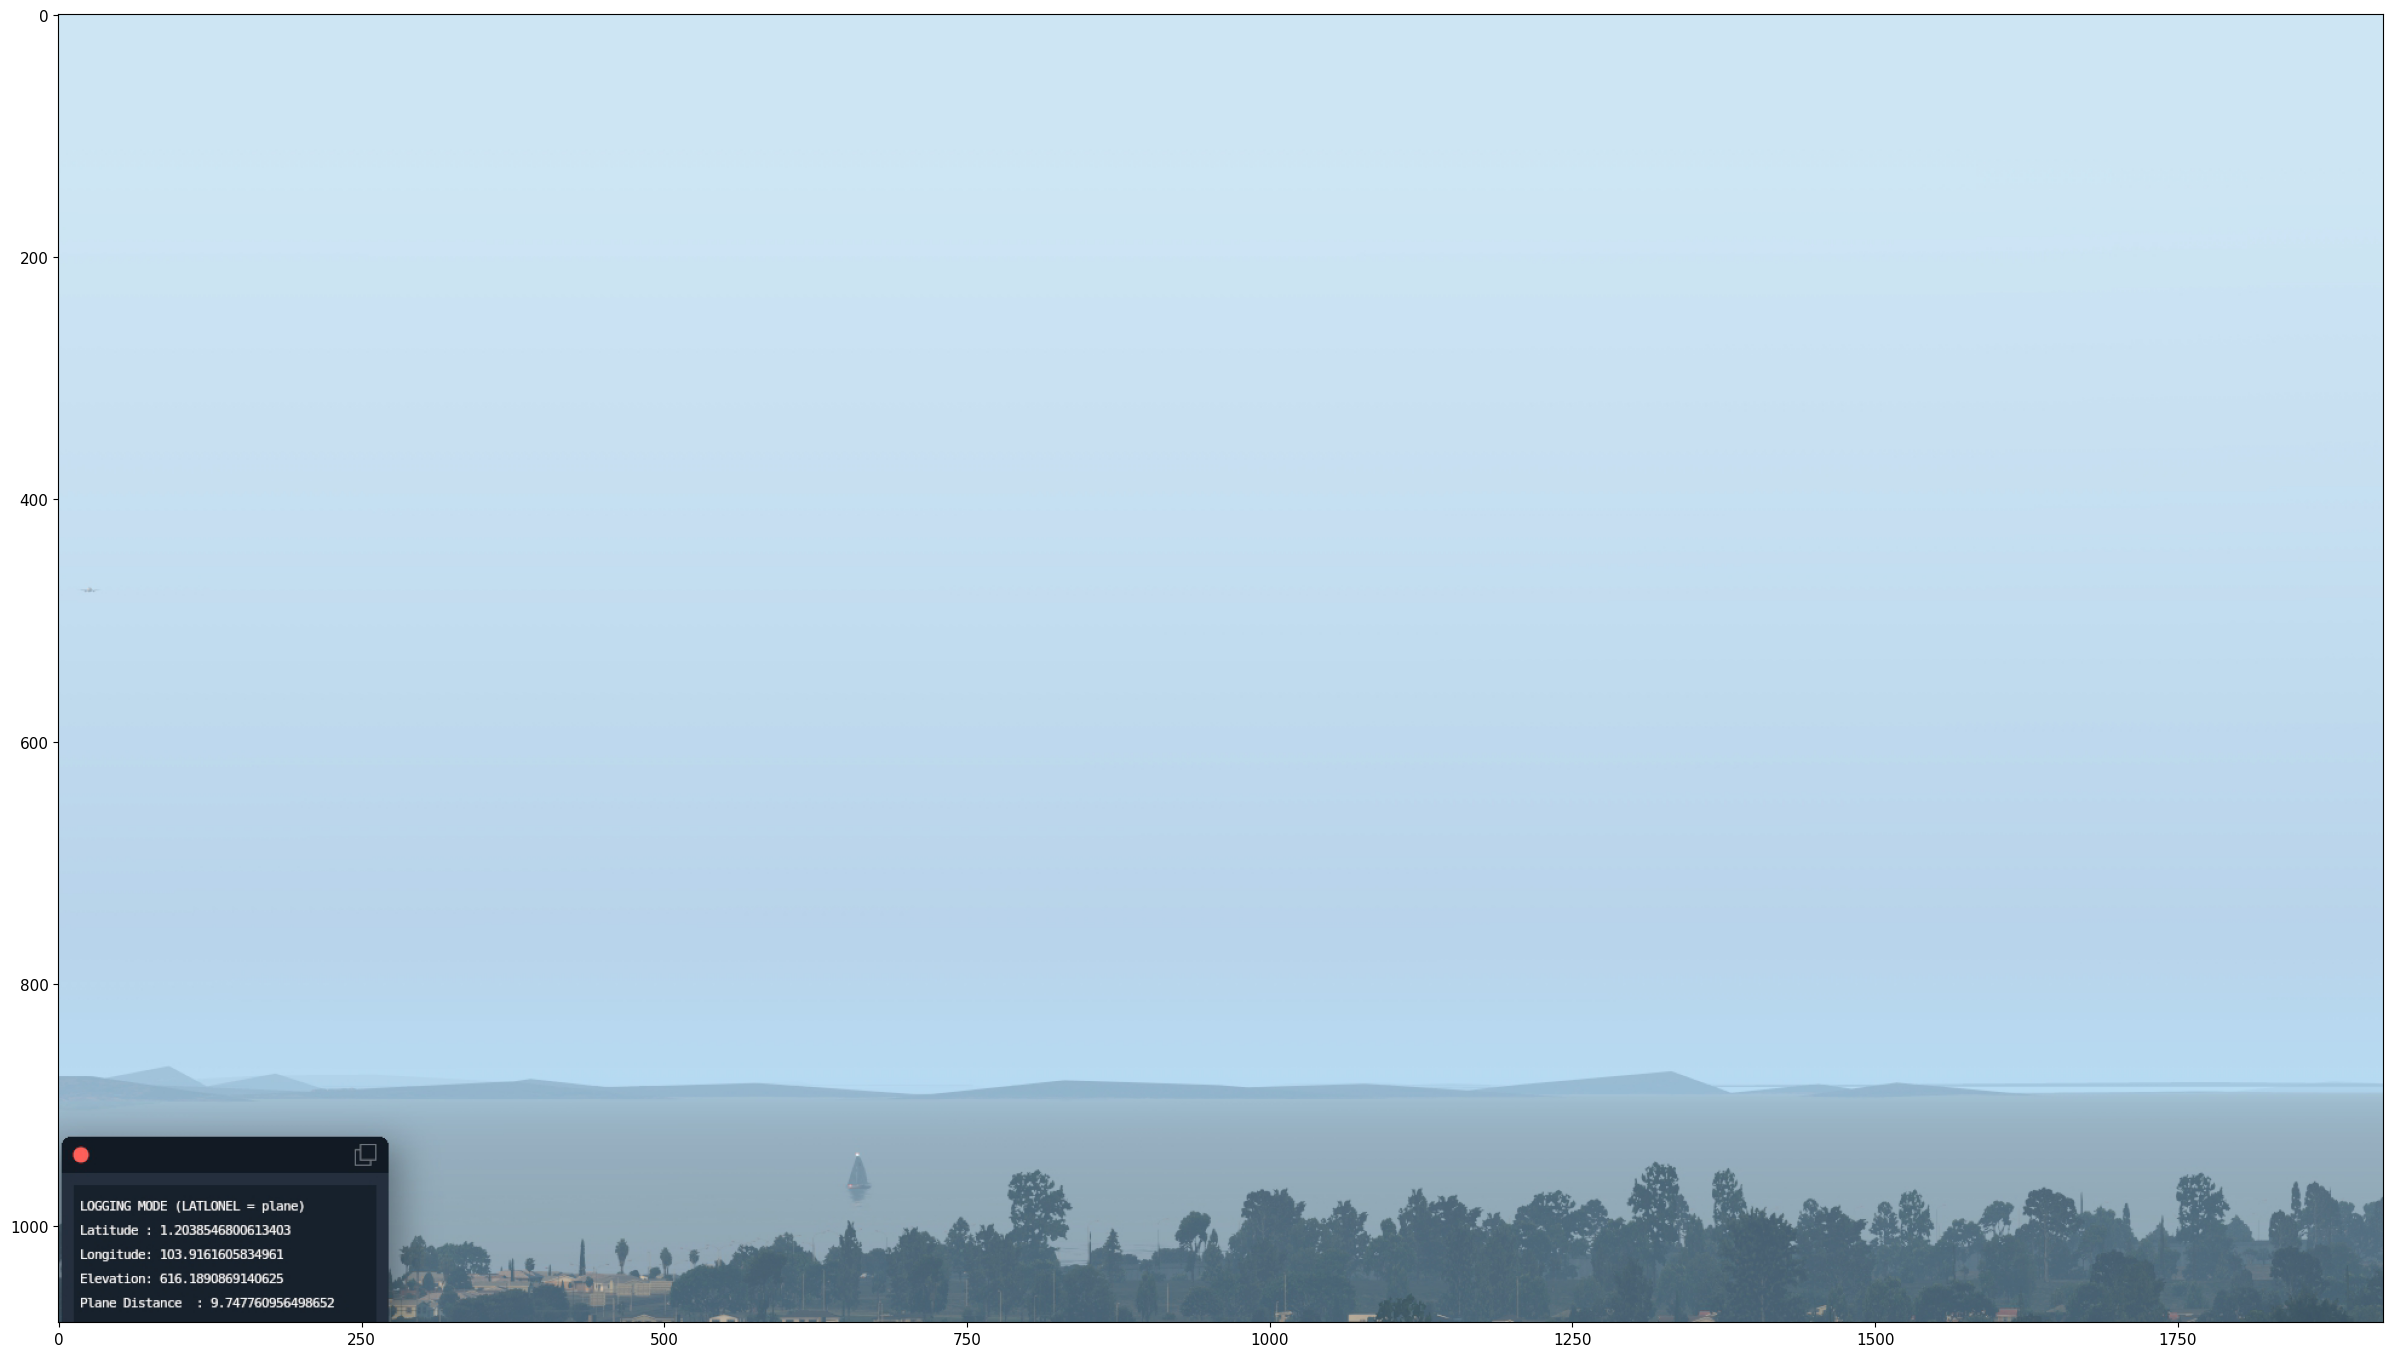

In [60]:
plt.figure(figsize =(30,30))
plt.imshow(np.ascontiguousarray(acd.get_frame_from_video(1, 316)))

In [4]:
pred, gt, img = acd.single_inference(0, mono_mode = True, verbose = True)

fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(img[0])

Inferencing using Mono Camera Model
No Airplanes Detected in Camera 0
  Predicted Distance (nm)    Ground Truth Distance (nm)    Errors (%)
-------------------------  ----------------------------  ------------
                  1.88239                           nan           nan
YOLO Inference Time : 6.353718519210815 (0 fps)
MLP  Inference Time : 0.004976749420166016 (200 fps)
Cumulative          : 6.3586952686309814 (0 fps)


C:\Users\gabriel\Anaconda3\envs\ad\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [120]:
out = cv2.VideoWriter('output.avi', -1, 30.0, (720, 1280))

for i in range(0, 100):
    det, pred, img, gt = acd.single_inference(i, mono_mode = True, verbose = False, vis = False)
    frame = viz_detection(det, pred, img, gt)
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
out.release()
cv2.destroyAllWindows()

RuntimeError: torch.cat(): expected a non-empty list of Tensors

Inferencing using Stereo Camera Model
  Predicted Distance (nm)    Ground Truth Distance (nm)    Errors (%)
-------------------------  ----------------------------  ------------
                  2.03817                        1.9942       2.15716
YOLO Inference Time : 1.447310447692871 (0 fps)
MLP  Inference Time : 0.0029878616333007812 (334 fps)
Cumulative          : 1.4502983093261719 (0 fps)


IndexError: index 2 is out of bounds for axis 0 with size 2

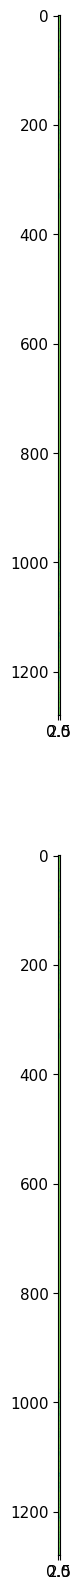

In [24]:
pred, gt, img = acd.single_inference(3500, mono_mode = False, verbose = True)

fig, ax = plt.subplots(2,1,figsize=(40,20))
for i in range(len(img)):
    ax[i].imshow(img[i])

In [4]:
acd.detect_and_compile(batch_size = 96)

Detecting Airplanes Using Yolov7


Detecting Objects for data 0:   0%|          | 0/51 [00:00<?, ?it/s]

C:\Users\gabriel\Anaconda3\envs\ad\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Detecting Objects for data 1:   0%|          | 0/55 [00:00<?, ?it/s]

Computing Camera to Aircraft Distances


  0%|          | 0/5313 [00:00<?, ?it/s]

Done!
